# Clause Word Order (Main Clauses)

In [1]:
from scripts.imports import *

# designate some additional parameters for a clause to be "main"
non_main = [
    'InfC', 'InfA', 'Reop', 
    'Voct', 'CPen', 'Ellp', 
    'MSyn',
]

main_df = df[
    (df.cl_rela == 'Main')
    & (~df.cl_type2.isin(non_main))
    & (df.n_times == 1)
    & (~df.cl_type.isin(['NmCl', 'AjCl']))
]

out = Exporter(
    paths['outdir'],
    'clause',
)

main_df.shape

(2217, 71)

# Exploring Word Order in TA Clauses

We have a strict / literal word order tag. We will eventially process that tag into narrower categories. But first, we can do a formal analysis of the strict tag.

In [2]:
clargs_count = main_df.cl_args.value_counts()

print(clargs_count.shape)

clargs_count.head(10)

(528,)


W-V-T        258
W-V-O-T       75
T-V-O         72
W-V-S-T       71
W-V-C-T       67
T-V           60
W-T-V-C       55
T-V-S         50
W-V-S-C-T     41
W-T-V         40
Name: cl_args, dtype: int64

In [3]:
out.number(
    clargs_count.shape[0],
    'n_clargtags'
)

'528'

In [4]:
', '.join(sorted(main_df[main_df['Time Position'] == 'medial'].cl_args.unique()))

'A-S-V-C-T-O, A-V-O-T-C, C-V-S-T-O-A, I-V-O-T-C, I-V-O-T-C-C, I-V-T-C, M-V-S-T-C, M-V-T-C, M-V-T-O, Q-V-C-T-S-C, Q-V-O-S-T-C, Q-V-T-C, Q-V-T-S, S-V-C-T-O, S-V-T-C, S-V-T-C-A, S-V-T-O, S-V-T-O-A, V-C-T-O, V-C-T-O-O, V-C-T-S, V-I-C-T-O, V-I-T-O, V-O-T-C, V-O-T-C-A, V-O-T-O, V-S-T-C, V-S-T-O, V-S-T-O-A, V-S-T-O-C, V-T-A-O, V-T-C, V-T-C-A, V-T-C-O, V-T-O, V-T-O-A, V-T-O-C, V-T-S, V-T-S-C, W-I-S-V-T-C, W-L-V-T-C, W-L-V-T-PrC-O-O, W-O-V-O-T-C, W-O-V-T-C, W-PrC-V-T-S, W-S-V-T-C, W-S-V-T-O, W-S-V-T-O-L, W-S-V-T-PrC-A-A, W-V-A-O-T-C, W-V-A-T-O-C, W-V-C-S-T-O, W-V-C-T-A-O, W-V-C-T-C, W-V-C-T-O, W-V-C-T-O-A, W-V-C-T-PrC, W-V-C-T-S, W-V-O-T-A-C-L-A, W-V-O-T-C, W-V-O-T-O, W-V-O-T-S, W-V-S-C-T-C, W-V-S-C-T-O, W-V-S-T-A-O, W-V-S-T-C, W-V-S-T-C-A, W-V-S-T-O, W-V-S-T-O-A, W-V-S-T-O-C, W-V-S-T-PrC, W-V-S-T-PrC-C, W-V-T-A-S, W-V-T-C, W-V-T-C-A, W-V-T-C-C, W-V-T-C-L, W-V-T-O, W-V-T-O-A, W-V-T-O-C-L, W-V-T-O-O, W-V-T-O-S, W-V-T-PrC, W-V-T-PrC-O, W-V-T-S, W-V-T-S-A, W-V-T-S-C-A, W-V-T-S-C-C, W-V-T-S-O'

In [5]:
', '.join(sorted(main_df[main_df['Time Position'] == 'preposed'].cl_args.unique()))

'A-T-C-V, A-T-V, A-T-V-O-A, C-T-V, C-T-V-O, C-T-V-PrC-C, C-T-V-S, C-T-V-S-C, I-T-V-C-S-C, I-T-V-O, I-T-V-O-A, I-T-V-S-O, M-S-T-V, M-T-S-V, M-T-V-C, O-T-V, Q-T-A-V, Q-T-V, Q-T-V-C, Q-T-V-O, Q-T-V-S, Q-T-V-S-A, S-T-O-V-A, S-T-V, S-T-V-C-C, S-T-V-O, S-T-V-O-A, T-A-PrC-V-C, T-A-S-V-C-O, T-A-T-V-C, T-A-V, T-A-V-C-A, T-A-V-O, T-A-V-O-C, T-C-V, T-C-V-O, T-C-V-S, T-L-M-V-S-A, T-M-V-S, T-M-V-S-C, T-O-V, T-O-V-C, T-PrA-V, T-PrC-V, T-S-V, T-S-V-A, T-S-V-C, T-S-V-C-A, T-S-V-L, T-S-V-O, T-S-V-O-A, T-S-V-PrC, T-T-V-S-A-A, T-V, T-V-A, T-V-A-A, T-V-A-C, T-V-A-L, T-V-A-O, T-V-A-S, T-V-C, T-V-C-A, T-V-C-C-A, T-V-C-C-A-A, T-V-C-L, T-V-C-O, T-V-C-O-A, T-V-C-PrC-A, T-V-C-S, T-V-C-S-O, T-V-L, T-V-L-O, T-V-M, T-V-M-S-A, T-V-O, T-V-O-A, T-V-O-A-C-C, T-V-O-C, T-V-O-C-A, T-V-O-I-C, T-V-O-L, T-V-O-M, T-V-O-O, T-V-O-O-C, T-V-O-S, T-V-O-S-A, T-V-O-S-A-L, T-V-O-S-C, T-V-PrC, T-V-PrC-A, T-V-PrC-C, T-V-PrC-S, T-V-PrC-S-A, T-V-S, T-V-S-A, T-V-S-A-A, T-V-S-A-A-A, T-V-S-A-C, T-V-S-A-L, T-V-S-A-O, T-V-S-C, T-V-S-C-A, T-V

In [6]:
', '.join(sorted(main_df[main_df['Time Position'] == 'final'].cl_args.unique()))

'A-O-V-C-S-T, A-S-V-O-O-T, A-S-V-T, A-V-C-O-T, A-V-C-S-L-L-T, A-V-C-T, A-V-O-O-T, A-V-O-S-T, A-V-O-T, A-V-S-C-L-T, A-V-S-O-T, A-V-S-PrC-C-T-A, A-V-S-T, A-V-T, C-S-V-M-T, C-S-V-T, C-V-C-T-A, C-V-O-T, C-V-S-T, C-V-S-T-A, C-V-T, I-S-V-C-T-M, I-S-V-L-T, I-V-S-O-A-M-T-A, L-V-S-C-A-T, L-V-T, M-O-V-O-T, M-V-C-L-O-T, M-V-C-T, M-V-C-T-A, M-V-O-I-T, M-V-O-T-A, M-V-S-PrC-T, M-V-S-T, M-V-T, M-V-T-A, O-S-V-T, O-V-A-T, O-V-C-L-T, O-V-C-T-A, O-V-O-T, O-V-T, O-V-T-A, PrC-V-C-T, PrC-V-S-T, Q-S-V-C-T, Q-V-C-T, Q-V-O-T, Q-V-PrC-T, Q-V-S-T, Q-V-T, Q-V-T-A, Q-V-T-A-A, S-C-V-T, S-V-C-A-M-T, S-V-C-L-T, S-V-C-T, S-V-C-T-A, S-V-M-T-A, S-V-O-A-T, S-V-O-T, S-V-PrC-C-T, S-V-PrC-T, S-V-T, S-V-T-A, T, V-A-T, V-C-M-S-PrC-T, V-C-O-T, V-C-T, V-I-C-S-T, V-I-C-T, V-I-O-T, V-I-T, V-L-T, V-M-T, V-O-A-C-T, V-O-A-T, V-O-C-T, V-O-O-T, V-O-S-T, V-O-T, V-O-T-A, V-PrC-S-T, V-PrC-T, V-S-A-T, V-S-C-T, V-S-C-T-A, V-S-O-C-T, V-S-O-T, V-S-T, V-S-T-L, V-T, V-T-A, V-T-M, V-T-PrA-A, W-A-S-V-A-T, W-A-S-V-C-T, W-A-V-S-C-O-T-L, W-A-V-T, W

## Overall Position Counts

In [7]:
pos_ct = main_df['Time Position'].value_counts()
pos_pr = pos_ct / pos_ct.sum()
pos_cp = join_ct_pr(pos_ct, pos_pr)
pos_cp.rename_axis(index='Time Position', inplace=True)

out.table(
    pos_cp,
    'posi_cp',
    caption='Counts for Time Clause Positions in Hebrew Bible'
)

pos_cp

,count,percent
Time Position,,
final,1246,56%
preposed,789,36%
medial,182,8%


In [8]:
out.number(
    pos_pr.loc['preposed']*100,
    'prepose_all_pr',
)

'36'

## Playing Around with Distribution Through HB

<AxesSubplot:xlabel='cl_clust10'>

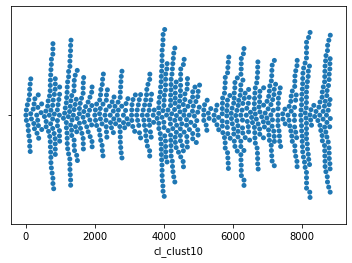

In [9]:
sns.swarmplot(x=main_df[main_df['Time Position'] == 'preposed'].cl_clust10)

<AxesSubplot:xlabel='cl_clust10'>

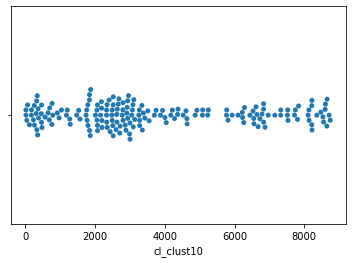

In [10]:
sns.swarmplot(x=main_df[main_df['Time Position'] == 'medial'].cl_clust10)

## Position Counts by Genre

In [11]:
posg_ct = pivot_ct(
    main_df,
    'gendom',
    'Time Position',
)

main_gen = ['prose.N', 'prose.Q', 'prophetic.Q', 'poetry.Q', 'instruction.Q']

posg_ct = posg_ct.loc[main_gen]

posg_pr = posg_ct.div(posg_ct.sum(1), 0).round(2)

out.table(
    posg_ct,
    'posig_ct',
    caption='Counts for Time Clause Positions by Genre',
)

Time Position,final,preposed,medial
gendom,,,
prose.N,529,117,68
prose.Q,243,164,63
prophetic.Q,159,153,16
poetry.Q,110,120,21
instruction.Q,107,82,7


In [12]:
out.table(
    posg_pr.mul(100).round(2).astype(int).astype(str)+'%',
    'posig_pr',
    caption='Percentages for Time Clause Positions by Genre',
)

Time Position,final,preposed,medial
gendom,,,
prose.N,74%,16%,10%
prose.Q,52%,35%,13%
prophetic.Q,48%,47%,5%
poetry.Q,44%,48%,8%
instruction.Q,55%,42%,4%


In [13]:
out.number(
    posg_pr.loc['prose.N']['preposed']*100,
    'proseN_pre_pr',
)

'16'

In [14]:
out.number(
    posg_pr.loc['prose.Q']['preposed']*100,
    'proseQ_pre_pr',
)

'35'

In [15]:
out.number(
    posg_pr.loc['poetry.Q']['preposed']*100,
    'poetry_pre_pr',
)

'48'

In [16]:
out.number(
    posg_pr.loc['prophetic.Q']['preposed']*100,
    'proph_pre_pr',
)

'47'

In [17]:
out.number(
    posg_pr.loc['instruction.Q']['preposed']*100,
    'instr_pre_pr',
)

'42'

In [18]:
# todo: make 2x3 subplots with barplots but have the last row
# omit a plot in order to plot 5 of them

# https://stackoverflow.com/questions/26767281/position-5-subplots-in-matplotlib

# Position Counts by Tokenlex

In [27]:
poslt_ct = pivot_ct(
    main_df,
    'lex_token',
    'Time Position',
)

print(poslt_ct.shape)

out.number(
    poslt_ct.shape[0],
    'shape_posltct_prefilt'
)

# filter out by occurrences at least 5
poslt_ct = poslt_ct[poslt_ct.sum(1) >= 5]

print(poslt_ct.shape)

out.number(
    poslt_ct.shape[0],
    'shape_posltct_filt'
)

out.number(
    poslt_ct.size,
    'size_posltct_filt'
)

out.table(
    poslt_ct.head(25),
    'poslt_ct_25',
    caption='Lexeme-Modifier Token Counts by Position in Clause (top 25)',
    hebindex=True
)

(89, 3)
(36, 3)


Time Position,final,preposed,medial
\texthebrew{מ׳.זמן},153,82,14
\texthebrew{ב.ה.זמן.הוא},114,58,35
\texthebrew{ב.זמן},99,66,10
\texthebrew{ה.זמן},92,32,36
\texthebrew{ל.זמן},86,42,12
\texthebrew{ב.ה.זמן},90,23,15
\texthebrew{ב.ה.זמן.ס׳},60,42,8
\texthebrew{עד.זמן},62,44,0
\texthebrew{זמן},53,41,10
\texthebrew{ב.מ׳.זמן},33,34,3


In [20]:
poslt_pr = poslt_ct.div(poslt_ct.sum(1), 0)

poslt_pr.head()

Time Position,final,preposed,medial
lex_token,,,
מ׳.זמן,0.614458,0.329317,0.056225
ב.ה.זמן.הוא,0.550725,0.280193,0.169082
ב.זמן,0.565714,0.377143,0.057143
ה.זמן,0.575000,0.200000,0.225000
ל.זמן,0.614286,0.300000,0.085714


In [21]:
poslt_dp = sig.apply_deltaP(poslt_ct, 0, 1)

poslt_dp.head()

Time Position,final,preposed,medial
lex_token,,,
מ׳.זמן,0.061210,-0.029575,-0.031635
ב.ה.זמן.הוא,-0.010734,-0.083348,0.094082
ב.זמן,0.005776,0.023659,-0.029435
ה.זמן,0.015773,-0.168073,0.152300
ל.זמן,0.057668,-0.059336,0.001668


In [22]:
poslt_pr_plot = poslt_pr.copy()

poslt_pr_plot.index = [get_display(tok) for tok in poslt_pr_plot.index]

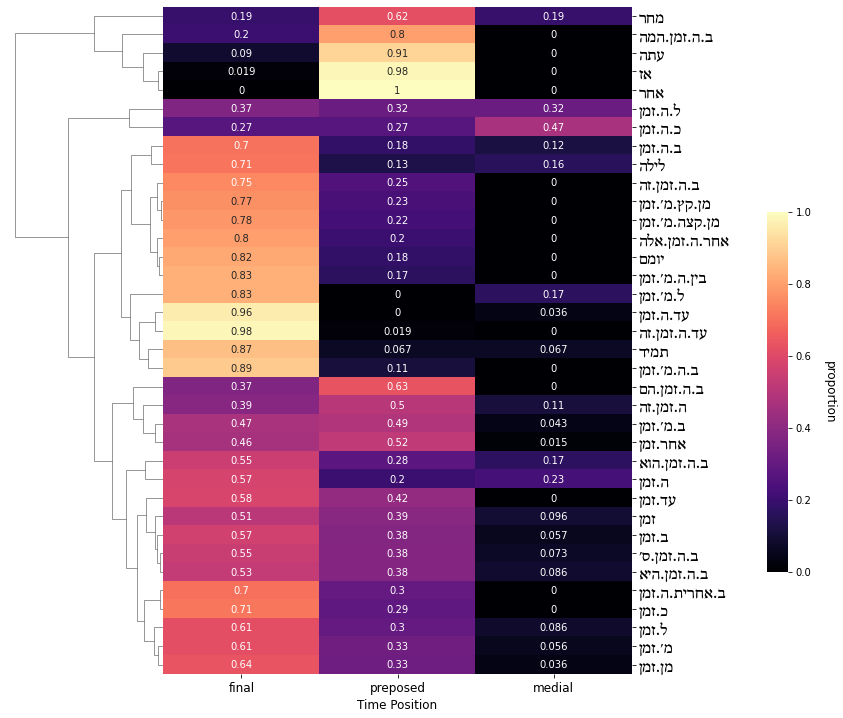

In [132]:
g = sns.clustermap(
    poslt_pr_plot, 
    dendrogram_ratio=(0.25, 0),
    cmap='magma', 
    col_cluster=False,
    cbar_pos=(1.07, .2, .03, .5),
    annot=True,
#    cbar_kws={'label': 'proportion'}
)

g.ax_heatmap.set_yticklabels(
    g.ax_heatmap.get_ymajorticklabels(), 
    fontsize = 16,
    fontfamily='SBL Biblit'
)

g.ax_heatmap.set_xlabel('Time Position', size=12)

g.ax_heatmap.set_xticklabels(
    g.ax_heatmap.get_xmajorticklabels(), 
    fontsize = 12,
)

g.ax_cbar.set_ylabel('proportion', size=12, rotation=270, labelpad=25)

out.plot(
    'clust_position_lextok',
)


### Pull out examples of interest

In [37]:
exs = [
  #  'ב.ה.זמן.הם',
    
]

inthosedays = main_df[(main_df.lex_token == 'ב.ה.זמן.המה')]

ts.show(
 inthosedays, extra=['Time Position', 'verbtense']
)

showing 5 of 5


,verse,clause,verb_utf8,Time Position,verbtense
node,,,,,
474165,Jeremiah 3:16,וּפְרִיתֶ֨ם בָּאָ֜רֶץ בַּיָּמִ֤ים הָהֵ֨מָּה֙,פרה,final,nan
474176,Jeremiah 3:18,בַּיָּמִ֣ים הָהֵ֔מָּה יֵלְכ֥וּ בֵית־יְהוּדָ֖ה עַל־בֵּ֣ית יִשְׂרָאֵ֑ל,הלך,preposed,MOD shall
474447,Jeremiah 5:18,וְגַ֛ם בַּיָּמִ֥ים הָהֵ֖מָּה לֹֽא־אֶעֱשֶׂ֥ה אִתְּכֶ֖ם כָּלָֽה׃,עשׂה,preposed,FUT
486576,Joel 3:2,וְגַ֥ם עַל־הָֽעֲבָדִ֖ים וְעַל־הַשְּׁפָחֹ֑ות בַּיָּמִ֣ים הָהֵ֔מָּה אֶשְׁפֹּ֖וךְ אֶת־רוּחִֽי׃,שׁפך,preposed,FUT
509765,Nehemiah 13:15,בַּיָּמִ֣ים הָהֵ֡מָּה רָאִ֣יתִי בִֽיהוּדָ֣ה׀,ראה,preposed,PAST


In [39]:
ts.show(
    main_df[(main_df.times_etcbc == 'MXR/') & (main_df['Time Position'] == 'final')], 
    extra=['Time Position', 'verbform', 'verbtense']
)

showing 6 of 6


,verse,clause,verb_utf8,Time Position,verbform,verbtense
node,,,,,,
434416,Exodus 8:25,וְסָ֣ר הֶעָרֹ֗ב מִפַּרְעֹ֛ה מֵעֲבָדָ֥יו וּמֵעַמֹּ֖ו מָחָ֑ר,סור,final,wqtl,MOD may
442095,Numbers 11:18,הִתְקַדְּשׁ֣וּ לְמָחָר֮,קדשׁ,final,impv,nan
442670,Numbers 16:7,וְשִׂימוּ֩ עֲלֵיהֶ֨ן קְטֹ֜רֶת לִפְנֵ֤י יְהוָה֙ מָחָ֔ר,שׂים,final,impv,nan
442711,Numbers 16:16,אַתָּה֙ וְכָל־עֲדָ֣תְךָ֔ הֱי֖וּ לִפְנֵ֣י יְהוָ֑ה אַתָּ֥ה וָהֵ֛ם וְאַהֲרֹ֖ן מָחָֽר׃,היה,final,impv,nan
449367,Joshua 7:13,הִתְקַדְּשׁ֣וּ לְמָחָ֑ר,קדשׁ,final,impv,nan
465714,2_Kings 6:28,וְאֶת־בְּנִ֖י נֹאכַ֥ל מָחָֽר׃,אכל,final,yqtl,FUT


In [35]:
inthosedays.verbtense.value_counts()

PAST         9
FUT          3
MOD shall    3
PAST PROG    1
Name: verbtense, dtype: int64

## Degree of Dispersion Test Across Genre

We can use degree of dispersion to test how consistently a given lextoken / position
occur between the various genre categories. That could give a clue as to how these values 
are changing.

In [31]:
posltg_ct = pivot_ct(
    main_df,
    'lex_token',
    ['gendom', 'Time Position'],
)

posltg_ct = posltg_ct.loc[:, idx[main_gen,:]]

posltg_ct.head()

gendom        prose.N                            prose.Q                    \
Time Position   final preposed medial 2 medial 1   final preposed medial 2   
lex_token                                                                    
מ׳.ז׳              84       22        7        0      21       10        6   
ב.ה.ז׳.הוא         52        6       24        1      12        1        2   
ב.ז׳               14       10        5        0      11        4        0   
ה.ז׳               24        1        2        0      45       13       32   
ב.ה.ז׳             55        1        3        0      21        6        3   

gendom                 prophetic.Q                            poetry.Q  \
Time Position medial 1       final preposed medial 2 medial 1    final   
lex_token                                                                
מ׳.ז׳                0           8        0        0        0        0   
ב.ה.ז׳.הוא           0          38       29        6        1        0   
ב.ז׳                 0          24       15        0        1       35   
ה.ז׳                 2           9        5        2        0       10   
ב.ה.ז׳               0           9        5        1        2        4   

gendom                                   instruction.Q                    \
Time Position preposed medial 2 medial 1         final preposed medial 2   
lex_token                                                                  
מ׳.ז׳                2        0        0            23       24        1   
ב.ה.ז׳.הוא           1        0        0             2        1        1   
ב.ז׳                12        4        0             4        9        1   
ה.ז׳                 6        0        3             1        1        0   
ב.ה.ז׳               5        7        1             5        2        0   

gendom                  
Time Position medial 1  
lex_token               
מ׳.ז׳                0  
ב.ה.ז׳.הוא           0  
ב.ז׳                 0  
ה.ז׳                 0  
ב.ה.ז׳               0